# Konfigurasi Spark

In [1]:
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "D:/spark"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

# Load Data & Proses Cleansing

In [219]:
# import library
import numpy as np #for mathematical manipulation
import pandas as pd #for database manipulation
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #better plotting library
%matplotlib inline

In [220]:
# read data from csv
data = pd.read_csv('D:/spark/tugasFP/911_train.csv')

In [221]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [222]:
# lihat info tipe data dari kolom dataframe
# data.info()

In [223]:
# drop atribut dummy 'e'
data = data.drop('e', axis=1)

In [224]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [225]:
# lihat konten atribut bernilai NaN (need cleansing)
data['zip'].head(5)

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4        NaN
Name: zip, dtype: float64

In [226]:
# lihat count total NaN value in atribut 'zip'
counter_non_nan=0
counter_nan=0

for i in range(0, len(data)):
    tmp_data_zip_nan = data['zip'][i]
#     tmp_data_lat_nan = data['lat'][i]
#     print tmp_data_zip_nan
    
    if tmp_data_zip_nan > 0:
        counter_non_nan+=1
    else:
        counter_nan+=1
                  
print "Jumlah data atribut 'zip' bertipe NaN:", counter_nan
print "Jumlah data atribut 'zip' exception NaN:", counter_non_nan

Jumlah data atribut 'zip' bertipe NaN: 112
Jumlah data atribut 'zip' exception NaN: 624


In [227]:
# print jumlah data awal dari tabel csv
print data.count()

lat          736
lng          736
desc         736
zip          624
title        736
timeStamp    736
twp          736
addr         736
dtype: int64


In [228]:
# remove NaN value in all tabel (cleansing)
clean_data = data.dropna()
print clean_data.count()

lat          624
lng          624
desc         624
zip          624
title        624
timeStamp    624
twp          624
addr         624
dtype: int64


In [229]:
clean_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST


# Proses Analisis Data

In [232]:
# get top10 zip code in emergency call from all data
top10_zip_all = pd.DataFrame(clean_data['zip'].value_counts().head(10))
top10_zip_all.reset_index(inplace=True)
top10_zip_all.columns = ['zip_code', 'jumlah_call']
top10_zip_all

# index=1
# for i in range(0, len(top10_zip)):
#     print "Peringkat ke-", top10_zip[:index]
#     index+=1

,zip_code,jumlah_call
0,19401.0,58
1,19464.0,47
2,19403.0,44
3,19446.0,37
4,19468.0,25
5,19406.0,24
6,19038.0,21
7,19428.0,21
8,19006.0,18
9,19454.0,18


In [234]:
# get top10 township in emergency call from train data
top10_town = pd.DataFrame(clean_data['twp'].value_counts().head(10))
top10_town.reset_index(inplace=True)
top10_town.columns = ['township', 'jumlah_call']
top10_town

,township,jumlah_call
0,NORRISTOWN,47
1,LOWER MERION,46
2,CHELTENHAM,34
3,ABINGTON,33
4,POTTSTOWN,32
5,WHITEMARSH,24
6,UPPER MERION,24
7,LOWER PROVIDENCE,23
8,LIMERICK,20
9,MONTGOMERY,19


In [235]:
# get top10 title from incident in emergency call from train data
top10_title = pd.DataFrame(clean_data['title'].value_counts().head(10))
top10_title.reset_index(inplace=True)
top10_title.columns = ['title_incident', 'jumlah_call']
top10_title

,title_incident,jumlah_call
0,Traffic: VEHICLE ACCIDENT -,152
1,Fire: FIRE ALARM,46
2,EMS: CARDIAC EMERGENCY,36
3,Traffic: DISABLED VEHICLE -,35
4,EMS: FALL VICTIM,34
5,EMS: RESPIRATORY EMERGENCY,31
6,EMS: HEAD INJURY,20
7,EMS: VEHICLE ACCIDENT,17
8,EMS: SUBJECT IN PAIN,16
9,EMS: SYNCOPAL EPISODE,14


In [236]:
# get most major incident categories from train data

clean_data['major_incident'] = clean_data['title'].apply(lambda v:v.split(':')[0])
most_major_incidents = clean_data['major_incident'].value_counts()
# print most_major_incidents

most_major_incident = pd.DataFrame(most_major_incidents)
most_major_incident.reset_index(inplace=True)
most_major_incident.columns = ['major_incident', 'jumlah_call']
most_major_incident

C:\Users\ASUS-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,major_incident,jumlah_call
0,EMS,319
1,Traffic,202
2,Fire,103


In [237]:
# get most sub incident categories from train data

clean_data['sub_incident'] = clean_data['title'].apply(lambda v:v.split(':')[1])
most_sub_incidents = clean_data['sub_incident'].value_counts()
# print most_sub_incidents

most_sub_incident = pd.DataFrame(most_sub_incidents)
most_sub_incident.reset_index(inplace=True)
most_sub_incident.columns = ['sub_incident', 'jumlah_call']
most_sub_incident.head(10)

C:\Users\ASUS-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,sub_incident,jumlah_call
0,VEHICLE ACCIDENT -,152
1,FIRE ALARM,46
2,CARDIAC EMERGENCY,36
3,DISABLED VEHICLE -,35
4,FALL VICTIM,34
5,RESPIRATORY EMERGENCY,31
6,VEHICLE ACCIDENT,25
7,HEAD INJURY,20
8,SUBJECT IN PAIN,16
9,SYNCOPAL EPISODE,14


In [238]:
# get breakdown timestamp in every incident

clean_data['timeStamp'] = pd.to_datetime(clean_data['timeStamp'])
# print clean_data['timeStamp']

clean_data['hour'] = clean_data['timeStamp'].apply(lambda v:v.hour)
clean_data['dayOfWeek'] = clean_data['timeStamp'].apply(lambda v:v.dayofweek)
clean_data['month'] = clean_data['timeStamp'].apply(lambda v:v.month)
clean_data['year'] = clean_data['timeStamp'].apply(lambda v:v.year)
clean_data['date'] = clean_data['timeStamp'].apply(lambda v:v.date())
# print clean_data['Hour']

# map day values to show day
day_map = {0:'Senin', 1:'Selasa', 2:'Rabu', 3:'Kamis', 4:'Jumat', 5:'Sabtu', 6:'Minggu'}
clean_data['dayOfWeek'] = clean_data['dayOfWeek'].map(day_map)

C:\Users\ASUS-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\ASUS-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ASUS-PC\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [239]:
clean_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,Kamis,12,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,17,Kamis,12,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,14,Kamis,12,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,16,Kamis,12,2015,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,15,Kamis,12,2015,2015-12-10


In [240]:
# make new tabel flag_data untuk menampung flag dari analisa kelas waktu (pagi, siang, sore, malam) incident
flag_data = clean_data.copy()

In [241]:
flag_data.reset_index().drop('index', axis=1, inplace=True)

In [244]:
# flag_data.head()

In [243]:
# inisiasi awal value di atribut baru (tmp_class_time_incident dan flag_class_time_incident)

# flag_data['tmp_class_time_incident'] = ''
# flag_data['flag_class_time_incident'] = 0

flag_data['tmp_class_time_incident'] = '-1'
flag_data['flag_class_time_incident'] = -1

In [245]:
flag_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date,tmp_class_time_incident,flag_class_time_incident
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,Kamis,12,2015,2015-12-10,-1,-1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,17,Kamis,12,2015,2015-12-10,-1,-1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,14,Kamis,12,2015,2015-12-10,-1,-1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,16,Kamis,12,2015,2015-12-10,-1,-1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,15,Kamis,12,2015,2015-12-10,-1,-1


In [246]:
# analisis data dengan 4 time class (pagi, siang, sore, malam) to insert in dict before place in tabel clean_data

flag_data.count()
# set_label_hours = ""
# tmp_label = {}

index=0
for tmp_hours in flag_data['hour']:       
#     print tmp_hours
    
    #set flag_class
    flag_data.loc[flag_data['hour']==6, 'flag_class_time_incident'] = 0
    flag_data.loc[flag_data['hour']==7, 'flag_class_time_incident'] = 0
    flag_data.loc[flag_data['hour']==8, 'flag_class_time_incident'] = 0
    flag_data.loc[flag_data['hour']==9, 'flag_class_time_incident'] = 0
    flag_data.loc[flag_data['hour']==10, 'flag_class_time_incident'] = 0
    flag_data.loc[flag_data['hour']==11, 'flag_class_time_incident'] = 0
    flag_data.loc[flag_data['hour']==12, 'flag_class_time_incident'] = 0
    
    flag_data.loc[flag_data['hour']==13, 'flag_class_time_incident'] = 1
    flag_data.loc[flag_data['hour']==14, 'flag_class_time_incident'] = 1
    flag_data.loc[flag_data['hour']==15, 'flag_class_time_incident'] = 1
    flag_data.loc[flag_data['hour']==16, 'flag_class_time_incident'] = 1
    flag_data.loc[flag_data['hour']==17, 'flag_class_time_incident'] = 1
    flag_data.loc[flag_data['hour']==18, 'flag_class_time_incident'] = 1
    
    flag_data.loc[flag_data['hour']==19, 'flag_class_time_incident'] = 2
    flag_data.loc[flag_data['hour']==20, 'flag_class_time_incident'] = 2
    flag_data.loc[flag_data['hour']==21, 'flag_class_time_incident'] = 2
    flag_data.loc[flag_data['hour']==22, 'flag_class_time_incident'] = 2
    flag_data.loc[flag_data['hour']==23, 'flag_class_time_incident'] = 2
    flag_data.loc[flag_data['hour']==24, 'flag_class_time_incident'] = 2
    
    flag_data.loc[flag_data['hour']==0, 'flag_class_time_incident'] = 3
    flag_data.loc[flag_data['hour']==1, 'flag_class_time_incident'] = 3
    flag_data.loc[flag_data['hour']==2, 'flag_class_time_incident'] = 3
    flag_data.loc[flag_data['hour']==3, 'flag_class_time_incident'] = 3
    flag_data.loc[flag_data['hour']==4, 'flag_class_time_incident'] = 3
    flag_data.loc[flag_data['hour']==5, 'flag_class_time_incident'] = 3
    
    
    #set tmp_name_class
    flag_data.loc[flag_data['hour']==6, 'tmp_class_time_incident'] = 'pagi'
    flag_data.loc[flag_data['hour']==7, 'tmp_class_time_incident'] = 'pagi'
    flag_data.loc[flag_data['hour']==8, 'tmp_class_time_incident'] = 'pagi'
    flag_data.loc[flag_data['hour']==9, 'tmp_class_time_incident'] = 'pagi'
    flag_data.loc[flag_data['hour']==10, 'tmp_class_time_incident'] = 'pagi'
    flag_data.loc[flag_data['hour']==11, 'tmp_class_time_incident'] = 'pagi'
    flag_data.loc[flag_data['hour']==12, 'tmp_class_time_incident'] = 'pagi'
    
    flag_data.loc[flag_data['hour']==13, 'tmp_class_time_incident'] = 'siang'
    flag_data.loc[flag_data['hour']==14, 'tmp_class_time_incident'] = 'siang'
    flag_data.loc[flag_data['hour']==15, 'tmp_class_time_incident'] = 'siang'
    flag_data.loc[flag_data['hour']==16, 'tmp_class_time_incident'] = 'siang'
    flag_data.loc[flag_data['hour']==17, 'tmp_class_time_incident'] = 'siang'
    flag_data.loc[flag_data['hour']==18, 'tmp_class_time_incident'] = 'siang'
    
    flag_data.loc[flag_data['hour']==19, 'tmp_class_time_incident'] = 'sore'
    flag_data.loc[flag_data['hour']==20, 'tmp_class_time_incident'] = 'sore'
    flag_data.loc[flag_data['hour']==21, 'tmp_class_time_incident'] = 'sore'
    flag_data.loc[flag_data['hour']==22, 'tmp_class_time_incident'] = 'sore'
    flag_data.loc[flag_data['hour']==23, 'tmp_class_time_incident'] = 'sore'
    flag_data.loc[flag_data['hour']==24, 'tmp_class_time_incident'] = 'sore'
    
    flag_data.loc[flag_data['hour']==0, 'tmp_class_time_incident'] = 'malam'
    flag_data.loc[flag_data['hour']==1, 'tmp_class_time_incident'] = 'malam'
    flag_data.loc[flag_data['hour']==2, 'tmp_class_time_incident'] = 'malam'
    flag_data.loc[flag_data['hour']==3, 'tmp_class_time_incident'] = 'malam'
    flag_data.loc[flag_data['hour']==4, 'tmp_class_time_incident'] = 'malam'
    flag_data.loc[flag_data['hour']==5, 'tmp_class_time_incident'] = 'malam'

    index+=1
    
#     if tmp_hours>=6 and tmp_hours<12:
# #         tmp_label[index]= 'Pagi'
#         set_label_hours = 'Pagi'
#         set_label_hours2 = 0
#         flag_data['tmp_class_time_incident'][index] = str(set_label_hours)
#         flag_data['flag_class_time_incident'][index] = int(set_label_hours2)
# #         print set_label_hours, set_label_hours2

#     elif tmp_hours>=12 and tmp_hours<18:
# #         tmp_label[index]= 'Siang'
#         set_label_hours = 'Siang'
#         set_label_hours2 = 1
#         flag_data['tmp_class_time_incident'][index] = str(set_label_hours)
#         flag_data['flag_class_time_incident'][index] = int(set_label_hours2)
# #         print set_label_hours, set_label_hours2

#     elif tmp_hours>=18 and tmp_hours<24:
# #         tmp_label[index]= 'Sore'
#         set_label_hours = 'Sore'
#         set_label_hours2 = 2
#         flag_data['tmp_class_time_incident'][index] = str(set_label_hours)
#         flag_data['flag_class_time_incident'][index] = int(set_label_hours2)
# #         print set_label_hours, set_label_hours2

#     elif tmp_hours==24:
# #         tmp_label[index]= 'Malam'
#         set_label_hours = 'Malam'
#         set_label_hours2 = 3
#         flag_data['tmp_class_time_incident'][index] = str(set_label_hours)
#         flag_data['flag_class_time_incident'][index] = int(set_label_hours2)
# #         print set_label_hours, set_label_hours2

#     elif tmp_hours>=0 and tmp_hours<6:
# #         tmp_label[index]= 'Malam'
#         set_label_hours = 'Malam'
#         set_label_hours2 = 3
#         flag_data['tmp_class_time_incident'][index] = str(set_label_hours)
#         flag_data['flag_class_time_incident'][index] = int(set_label_hours2)
# #         print set_label_hours, set_label_hours2
    
# print tmp_label

In [163]:
# flag_data['tmp_class_time_incident']

In [164]:
# flag_data['flag_class_time_incident']

In [247]:
# flag_data['flag_class_time_incident'] = flag_data['flag_class_time_incident'].astype(int)
flag_data.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date,tmp_class_time_incident,flag_class_time_incident
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,Kamis,12,2015,2015-12-10,siang,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,17,Kamis,12,2015,2015-12-10,siang,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,14,Kamis,12,2015,2015-12-10,siang,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,16,Kamis,12,2015,2015-12-10,siang,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,15,Kamis,12,2015,2015-12-10,siang,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,EMS,NAUSEA/VOMITING,16,Kamis,12,2015,2015-12-10,siang,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,EMS,RESPIRATORY EMERGENCY,16,Kamis,12,2015,2015-12-10,siang,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,EMS,SYNCOPAL EPISODE,16,Kamis,12,2015,2015-12-10,siang,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,Traffic,VEHICLE ACCIDENT -,17,Kamis,12,2015,2015-12-10,siang,1
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 16:32:10,PLYMOUTH,BROOK RD & COLWELL LN,Traffic,VEHICLE ACCIDENT -,16,Kamis,12,2015,2015-12-10,siang,1


In [248]:
#show incident in range time 'pagi', 'siang', 'sore', 'malam'
counter=0
counter_pagi=0
counter_siang=0
counter_sore=0
counter_malam=0

for i in flag_data['flag_class_time_incident']:
    if i==0:
        counter_pagi+=1
    elif i==1:
        counter_siang+=1
    elif i==2:
        counter_sore+=1
    elif i==3:
        counter_malam+=1
        
    counter+=1

print "Jumlah insiden di pagi hari:", counter_pagi, "kasus"
print "Jumlah insiden di siang hari:", counter_siang, "kasus"
print "Jumlah insiden di sore hari:", counter_sore, "kasus"
print "Jumlah insiden di malam hari:", counter_malam, "kasus"

Jumlah insiden di pagi hari: 182 kasus
Jumlah insiden di siang hari: 247 kasus
Jumlah insiden di sore hari: 128 kasus
Jumlah insiden di malam hari: 67 kasus


# Data Train & Testing

In [250]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# split to data test and data train
train_data2, test_data2 = train_test_split(flag_data, train_size=0.8)

In [251]:
print "Data trainning:", train_data2.shape
print "Data testing:", test_data2.shape

Data trainning: (499, 17)
Data testing: (125, 17)


# Proses Data Mining

In [279]:
# import library
from sklearn.cluster import KMeans

In [280]:
# make new tabel (data_locat) from master tabel (clean_data) contains graphical value for clustering with kmeans

# data_locat = flag_data.copy()
data_train_locat = train_data2.copy()
data_train_locat.reset_index().drop('index', axis=1, inplace=True)

In [281]:
data_train_locat.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date,tmp_class_time_incident,flag_class_time_incident
645,40.161470,-75.130159,COMMERCE AVE & MARYLAND RD; UPPER MORELAND; S...,19090.0,EMS: CARDIAC EMERGENCY,2015-12-12 13:10:11,UPPER MORELAND,COMMERCE AVE & MARYLAND RD,EMS,CARDIAC EMERGENCY,13,Sabtu,12,2015,2015-12-12,siang,1
149,40.155827,-75.365208,GERMANTOWN PIKE & BRIDLE PATH RD; EAST NORRITO...,19403.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 06:17:56,EAST NORRITON,GERMANTOWN PIKE & BRIDLE PATH RD,Traffic,VEHICLE ACCIDENT -,6,Jumat,12,2015,2015-12-11,pagi,0
313,40.105890,-75.084741,HUNTINGDON PIKE & MOREDON RD; ABINGTON; Stati...,19006.0,EMS: FALL VICTIM,2015-12-11 15:07:45,ABINGTON,HUNTINGDON PIKE & MOREDON RD,EMS,FALL VICTIM,15,Jumat,12,2015,2015-12-11,siang,1
200,40.182374,-75.104914,YORK RD & VILLAGE PL; HATBORO; Station 384; 2...,19040.0,EMS: SYNCOPAL EPISODE,2015-12-11 09:38:57,HATBORO,YORK RD & VILLAGE PL,EMS,SYNCOPAL EPISODE,9,Jumat,12,2015,2015-12-11,pagi,0
603,40.008412,-75.289491,ST GEORGES RD & COULTER AVE; LOWER MERION; 201...,19003.0,Traffic: VEHICLE ACCIDENT -,2015-12-12 10:44:16,LOWER MERION,ST GEORGES RD & COULTER AVE,Traffic,VEHICLE ACCIDENT -,10,Sabtu,12,2015,2015-12-12,pagi,0


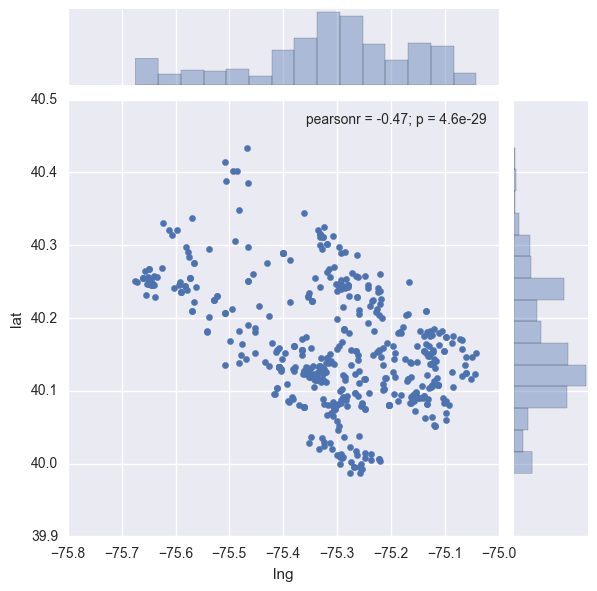

In [282]:
# show sebaran lokasi calls dari dataset 911
sns.jointplot(data=data_train_locat, x='lng', y='lat', kind='scatter')

In [283]:
# inisiasi value untuk clustering berdasarkan latitude dan longitude
x_mean = data_train_locat['lng'].mean()
y_mean = data_train_locat['lat'].mean()

print "rata-rata longitude:", x_mean
print "rat-rata latitude:", y_mean

data_train_locat['x_axis'] = data_train_locat['lng'].map(lambda v:v-x_mean)
data_train_locat['y_axis'] = data_train_locat['lat'].map(lambda v:v-y_mean)

rata-rata longitude: -75.3151834437
rat-rata latitude: 40.1594998259


In [284]:
data_train_locat.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date,tmp_class_time_incident,flag_class_time_incident,x_axis,y_axis
645,40.161470,-75.130159,COMMERCE AVE & MARYLAND RD; UPPER MORELAND; S...,19090.0,EMS: CARDIAC EMERGENCY,2015-12-12 13:10:11,UPPER MORELAND,COMMERCE AVE & MARYLAND RD,EMS,CARDIAC EMERGENCY,13,Sabtu,12,2015,2015-12-12,siang,1,0.185025,0.001970
149,40.155827,-75.365208,GERMANTOWN PIKE & BRIDLE PATH RD; EAST NORRITO...,19403.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 06:17:56,EAST NORRITON,GERMANTOWN PIKE & BRIDLE PATH RD,Traffic,VEHICLE ACCIDENT -,6,Jumat,12,2015,2015-12-11,pagi,0,-0.050025,-0.003673
313,40.105890,-75.084741,HUNTINGDON PIKE & MOREDON RD; ABINGTON; Stati...,19006.0,EMS: FALL VICTIM,2015-12-11 15:07:45,ABINGTON,HUNTINGDON PIKE & MOREDON RD,EMS,FALL VICTIM,15,Jumat,12,2015,2015-12-11,siang,1,0.230443,-0.053610
200,40.182374,-75.104914,YORK RD & VILLAGE PL; HATBORO; Station 384; 2...,19040.0,EMS: SYNCOPAL EPISODE,2015-12-11 09:38:57,HATBORO,YORK RD & VILLAGE PL,EMS,SYNCOPAL EPISODE,9,Jumat,12,2015,2015-12-11,pagi,0,0.210270,0.022874
603,40.008412,-75.289491,ST GEORGES RD & COULTER AVE; LOWER MERION; 201...,19003.0,Traffic: VEHICLE ACCIDENT -,2015-12-12 10:44:16,LOWER MERION,ST GEORGES RD & COULTER AVE,Traffic,VEHICLE ACCIDENT -,10,Sabtu,12,2015,2015-12-12,pagi,0,0.025692,-0.151088


In [285]:
X = data_train_locat[['x_axis','y_axis']].reset_index().drop('index',axis=1)

In [286]:
# (CLUSTER) try with default n cluster=10
# case: get cluster based from latitude and longitude coordinate place
cluster_kmeans = KMeans(n_clusters=6)

In [287]:
# show properties from kmeans clustering
cluster_kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

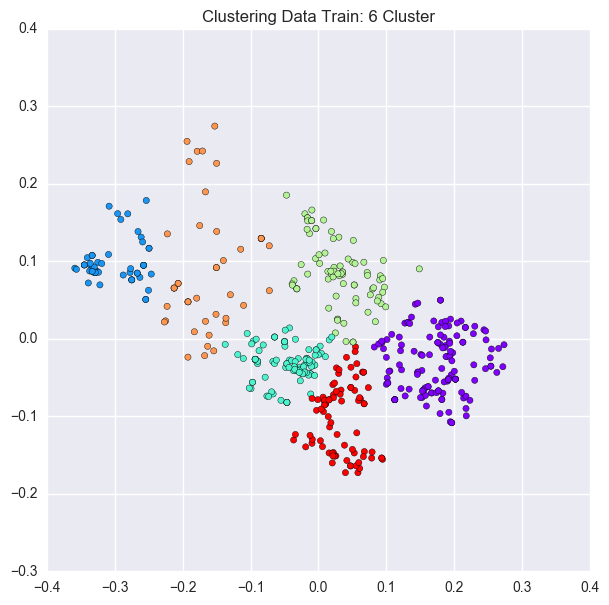

In [288]:
fig = plt.figure(figsize=(7,7))
plt.scatter(X['x_axis'], X['y_axis'], c=cluster_kmeans.labels_, cmap='rainbow')
plt.title("Clustering Data Train: 6 Cluster")
# plt.xlim(-0.3,0.3)

In [289]:
cluster_kmeans.labels_

array([0, 2, 0, 0, 5, 0, 0, 5, 5, 0, 3, 1, 0, 2, 5, 3, 5, 5, 0, 3, 2, 1, 4,
       1, 0, 2, 3, 0, 2, 0, 2, 5, 0, 3, 0, 2, 3, 2, 5, 4, 2, 2, 0, 0, 1, 1,
       4, 3, 1, 4, 5, 1, 0, 3, 1, 0, 1, 2, 2, 4, 0, 1, 0, 5, 3, 2, 3, 5, 3,
       1, 0, 2, 3, 3, 3, 5, 2, 2, 2, 0, 2, 0, 5, 2, 0, 3, 3, 0, 0, 0, 2, 3,
       1, 3, 0, 3, 3, 2, 0, 0, 3, 2, 5, 1, 5, 3, 0, 4, 3, 3, 0, 1, 0, 0, 1,
       0, 3, 1, 5, 0, 3, 0, 0, 4, 0, 5, 1, 5, 5, 2, 0, 5, 0, 0, 2, 2, 0, 2,
       0, 3, 4, 2, 1, 4, 5, 5, 0, 5, 4, 4, 4, 2, 1, 5, 2, 2, 3, 2, 4, 5, 0,
       2, 1, 0, 0, 1, 5, 0, 2, 3, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 4, 2, 2, 2,
       0, 5, 5, 3, 0, 1, 3, 0, 2, 4, 0, 2, 2, 0, 0, 3, 0, 2, 3, 2, 5, 2, 1,
       2, 2, 2, 5, 5, 4, 5, 5, 2, 3, 2, 1, 3, 5, 1, 2, 3, 2, 5, 0, 4, 5, 4,
       2, 0, 3, 5, 1, 0, 2, 0, 2, 3, 5, 3, 3, 0, 1, 0, 5, 2, 1, 5, 0, 3, 3,
       3, 5, 5, 1, 2, 0, 5, 0, 3, 0, 2, 0, 2, 0, 0, 5, 0, 1, 4, 3, 2, 4, 0,
       0, 2, 2, 5, 0, 5, 0, 1, 2, 5, 0, 0, 5, 4, 2, 4, 3, 5, 2, 4, 2, 0, 3,
       0, 3,

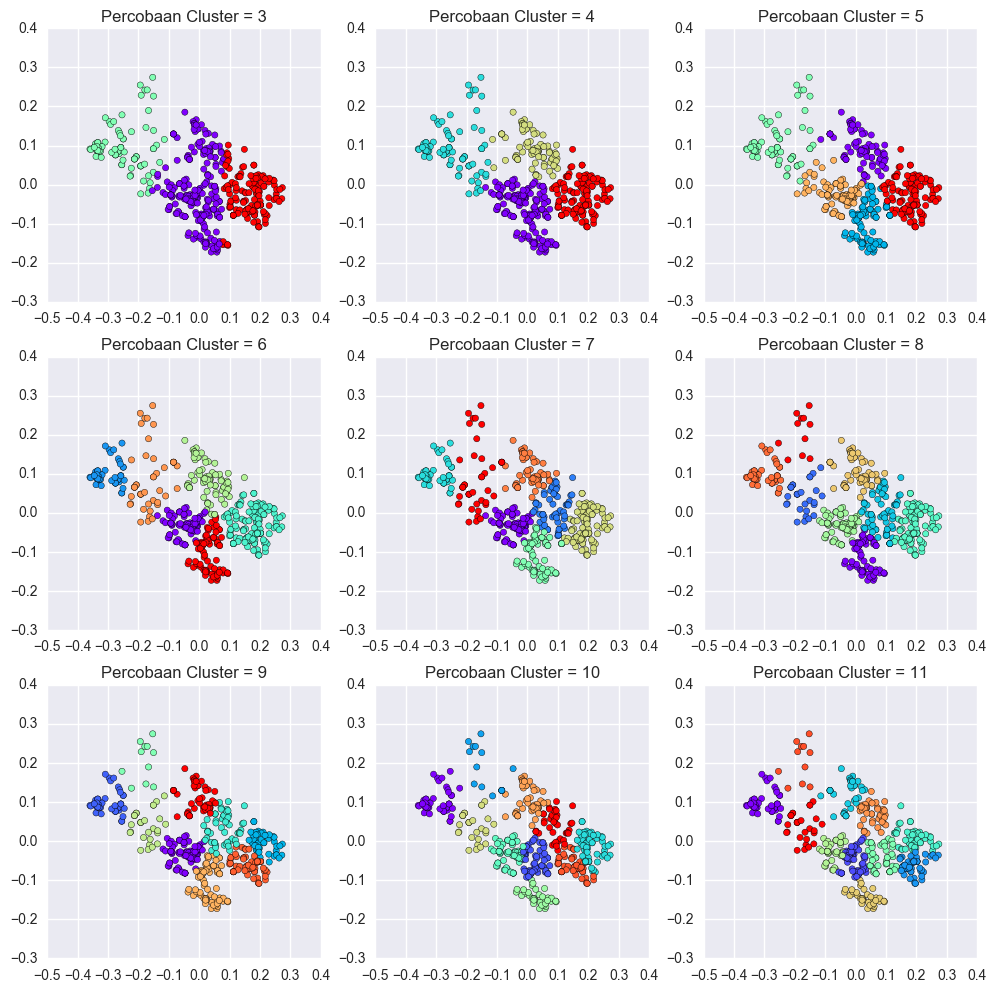

In [290]:
# try with other n cluster (custom)

fig = plt.figure(figsize=(12,12))
for i in range(3, 12):
    cluster_kmeans_custom = KMeans(n_clusters=i)
    cluster_kmeans_custom.fit(X)
    fig.add_subplot(3,3,i-2)
    
    plt.scatter(X['x_axis'],X['y_axis'], c=cluster_kmeans_custom.labels_, cmap='rainbow')
    plt.title("Percobaan Cluster = {}".format(i))
#     plt.xlim(-0.3,0.3)

In [291]:
data_tmp_train_locat = data_train_locat.copy()

In [292]:
data_tmp_train_locat.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date,tmp_class_time_incident,flag_class_time_incident,x_axis,y_axis
645,40.161470,-75.130159,COMMERCE AVE & MARYLAND RD; UPPER MORELAND; S...,19090.0,EMS: CARDIAC EMERGENCY,2015-12-12 13:10:11,UPPER MORELAND,COMMERCE AVE & MARYLAND RD,EMS,CARDIAC EMERGENCY,13,Sabtu,12,2015,2015-12-12,siang,1,0.185025,0.001970
149,40.155827,-75.365208,GERMANTOWN PIKE & BRIDLE PATH RD; EAST NORRITO...,19403.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 06:17:56,EAST NORRITON,GERMANTOWN PIKE & BRIDLE PATH RD,Traffic,VEHICLE ACCIDENT -,6,Jumat,12,2015,2015-12-11,pagi,0,-0.050025,-0.003673


In [293]:
# data_unique = data_tmp_train_locat['flag_class_time_incident'].nunique()
# print "Terdapat", data_unique, "data class yang berbeda dari hasil analisa waktu insiden"

In [294]:
data_train_cluster = pd.concat([data_tmp_train_locat.reset_index().drop('index', axis=1), pd.DataFrame(cluster_kmeans.labels_, columns=['cluster_loc'])], axis=1)

In [295]:
data_train_cluster.drop(['desc'], axis=1, inplace=True)

In [296]:
data_train_cluster.head()

,lat,lng,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date,tmp_class_time_incident,flag_class_time_incident,x_axis,y_axis,cluster_loc
0,40.161470,-75.130159,19090.0,EMS: CARDIAC EMERGENCY,2015-12-12 13:10:11,UPPER MORELAND,COMMERCE AVE & MARYLAND RD,EMS,CARDIAC EMERGENCY,13,Sabtu,12,2015,2015-12-12,siang,1,0.185025,0.001970,0
1,40.155827,-75.365208,19403.0,Traffic: VEHICLE ACCIDENT -,2015-12-11 06:17:56,EAST NORRITON,GERMANTOWN PIKE & BRIDLE PATH RD,Traffic,VEHICLE ACCIDENT -,6,Jumat,12,2015,2015-12-11,pagi,0,-0.050025,-0.003673,2
2,40.105890,-75.084741,19006.0,EMS: FALL VICTIM,2015-12-11 15:07:45,ABINGTON,HUNTINGDON PIKE & MOREDON RD,EMS,FALL VICTIM,15,Jumat,12,2015,2015-12-11,siang,1,0.230443,-0.053610,0
3,40.182374,-75.104914,19040.0,EMS: SYNCOPAL EPISODE,2015-12-11 09:38:57,HATBORO,YORK RD & VILLAGE PL,EMS,SYNCOPAL EPISODE,9,Jumat,12,2015,2015-12-11,pagi,0,0.210270,0.022874,0
4,40.008412,-75.289491,19003.0,Traffic: VEHICLE ACCIDENT -,2015-12-12 10:44:16,LOWER MERION,ST GEORGES RD & COULTER AVE,Traffic,VEHICLE ACCIDENT -,10,Sabtu,12,2015,2015-12-12,pagi,0,0.025692,-0.151088,5


In [298]:
# show most incident time in cluster zone
po = pd.DataFrame(data_train_cluster['cluster_loc'].value_counts().head(10))
po.reset_index(inplace=True)
po.columns = ['cluster_loc', 'jumlah_call']
po

# po.sort(['cluster_loc', 'jumlah_call'], ascending=[1,0])

,cluster_loc,jumlah_call
0,0,134
1,2,103
2,5,83
3,3,80
4,1,55
5,4,44


In [299]:
# show total incident in cluster zone based on latitude and longitude

counter_0_0 = counter_0_1 = counter_0_2 = counter_0_3 = 0
counter_1_0 = counter_1_1 = counter_1_2 = counter_1_3 = 0
counter_2_0 = counter_2_1 = counter_2_2 = counter_2_3 = 0
counter_3_0 = counter_3_1 = counter_3_2 = counter_3_3 = 0
counter_4_0 = counter_4_1 = counter_4_2 = counter_4_3 = 0
counter_5_0 = counter_5_1 = counter_5_2 = counter_5_3 = 0

jon=0
satu = dua = tiga = empat = lima = nol = 0

for i in data_train_cluster['cluster_loc']:
#     print i    
    if data_train_cluster['cluster_loc'][jon]==0:
        if data_train_cluster['flag_class_time_incident'][jon]==0:
            counter_0_0+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==1:
            counter_0_1+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==2:
            counter_0_2+=1
        else:
            counter_0_3+=1
            
        nol+=1
        
    elif data_train_cluster['cluster_loc'][jon]==1:
#         print "nilai 1"
        if data_train_cluster['flag_class_time_incident'][jon]==0:
            counter_1_0+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==1:
            counter_1_1+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==2:
            counter_1_2+=1
        else:
            counter_1_3+=1

        satu+=1
        
    elif data_train_cluster['cluster_loc'][jon]==2:
#         print "nilai 2"
        if data_train_cluster['flag_class_time_incident'][jon]==0:
            counter_2_0+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==1:
            counter_2_1+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==2:
            counter_2_2+=1
        else:
            counter_2_3+=1

        dua+=1
        
    elif data_train_cluster['cluster_loc'][jon]==3:
#         print "nilai 3"
        if data_train_cluster['flag_class_time_incident'][jon]==0:
            counter_3_0+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==1:
            counter_3_1+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==2:
            counter_3_2+=1
        else:
            counter_3_3+=1
            
        tiga+=1
        
    elif data_train_cluster['cluster_loc'][jon]==4:
#         print "nilai 4"
        if data_train_cluster['flag_class_time_incident'][jon]==0:
            counter_4_0+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==1:
            counter_4_1+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==2:
            counter_4_2+=1
        else:
            counter_4_3+=1
            
        empat+=1
    else:
#         print "nilai 5"
        if data_train_cluster['flag_class_time_incident'][jon]==0:
            counter_5_0+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==1:
            counter_5_1+=1
        elif data_train_cluster['flag_class_time_incident'][jon]==2:
            counter_5_2+=1
        else:
            counter_5_3+=1
            
        lima+=1
        
    jon+=1
    
# print nol
# print satu
# print dua
# print tiga
# print empat
# print lima
          
# print "jon:", jon

print "======== Cluster 0 ========"
print "Jumlah insiden di pagi hari pada cluster 0:", counter_0_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 0:", counter_0_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 0:", counter_0_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 0:", counter_0_3, "kasus"

print "\n======== Cluster 1 ========"
print "Jumlah insiden di pagi hari pada cluster 1:", counter_1_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 1:", counter_1_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 1:", counter_1_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 1:", counter_1_3, "kasus"

print "\n======== Cluster 2 ========"
print "Jumlah insiden di pagi hari pada cluster 2:", counter_2_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 2:", counter_2_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 2:", counter_2_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 2:", counter_2_3, "kasus"

print "\n======== Cluster 3 ========"
print "Jumlah insiden di pagi hari pada cluster 3:", counter_3_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 3:", counter_3_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 3:", counter_3_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 3:", counter_3_3, "kasus"

print "\n======== Cluster 4 ========"
print "Jumlah insiden di pagi hari pada cluster 4:", counter_4_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 4:", counter_4_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 4:", counter_4_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 4:", counter_4_3, "kasus"

print "\n======== Cluster 5 ========"
print "Jumlah insiden di pagi hari pada cluster 5:", counter_5_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 5:", counter_5_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 5:", counter_5_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 5:", counter_5_3, "kasus"

======== Cluster 0 ========
Jumlah insiden di pagi hari pada cluster 0: 49 kasus
Jumlah insiden di siang hari pada cluster 0: 47 kasus
Jumlah insiden di sore hari pada cluster 0: 27 kasus
Jumlah insiden di malam hari pada cluster 0: 11 kasus

======== Cluster 1 ========
Jumlah insiden di pagi hari pada cluster 1: 9 kasus
Jumlah insiden di siang hari pada cluster 1: 17 kasus
Jumlah insiden di sore hari pada cluster 1: 25 kasus
Jumlah insiden di malam hari pada cluster 1: 4 kasus

======== Cluster 2 ========
Jumlah insiden di pagi hari pada cluster 2: 35 kasus
Jumlah insiden di siang hari pada cluster 2: 39 kasus
Jumlah insiden di sore hari pada cluster 2: 19 kasus
Jumlah insiden di malam hari pada cluster 2: 10 kasus

======== Cluster 3 ========
Jumlah insiden di pagi hari pada cluster 3: 18 kasus
Jumlah insiden di siang hari pada cluster 3: 39 kasus
Jumlah insiden di sore hari pada cluster 3: 17 kasus
Jumlah insiden di malam hari pada cluster 3: 6 kasus

======== Cluster 4 ========
Jum

In [300]:
cluster_loc_array = [0, 1, 2, 3, 4, 5]
pagi_array = [counter_0_0, counter_1_0, counter_2_0, counter_3_0, counter_4_0, counter_5_0]
siang_array = [counter_0_1, counter_1_1, counter_2_1, counter_3_1, counter_4_1, counter_5_1]
sore_array = [counter_0_2, counter_1_2, counter_2_2, counter_3_2, counter_4_2, counter_5_2]
malam_array = [counter_0_3, counter_1_3, counter_2_3, counter_3_3, counter_4_3, counter_5_3]

data_list_cluster_based_time_incident = pd.DataFrame({'cluster_loc': cluster_loc_array, 'pagi': pagi_array, 'siang': siang_array, 'sore': sore_array, 'malam': malam_array})

In [301]:
data_list_cluster_based_time_incident

,cluster_loc,malam,pagi,siang,sore
0,0,11,49,47,27
1,1,4,9,17,25
2,2,10,35,39,19
3,3,6,18,39,17
4,4,8,13,17,6
5,5,17,21,29,16


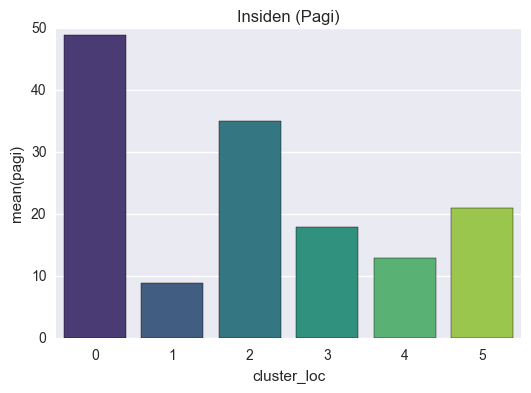

In [302]:
plt.title("Insiden (Pagi)")
# sns.lmplot('malam', 'cluster_loc', data=data_list_cluster_based_time_incident, fit_reg=False)

# fig1 = plt.figure(figsize=(3,3))
sns.barplot(data=data_list_cluster_based_time_incident, x='cluster_loc', y='pagi', palette="viridis")
# fig1.tight_layout()

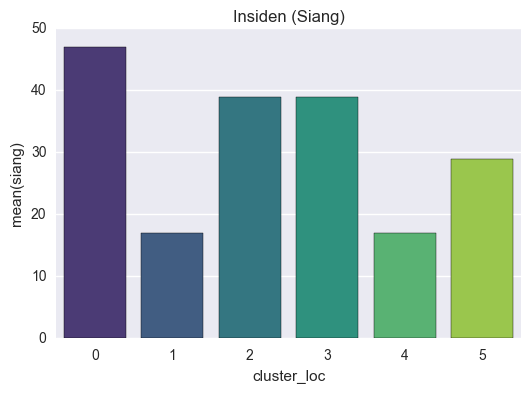

In [303]:
plt.title("Insiden (Siang)")
sns.barplot(data=data_list_cluster_based_time_incident, x='cluster_loc', y='siang', palette="viridis")

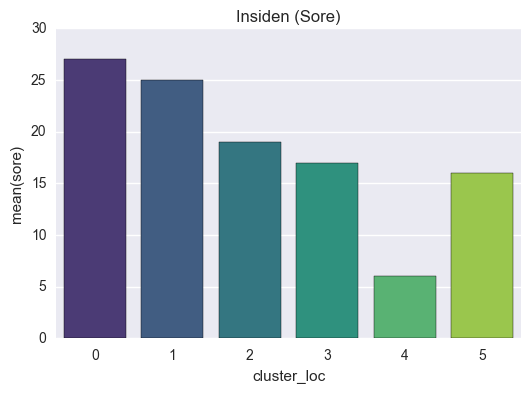

In [304]:
plt.title("Insiden (Sore)")
sns.barplot(data=data_list_cluster_based_time_incident, x='cluster_loc', y='sore', palette="viridis")

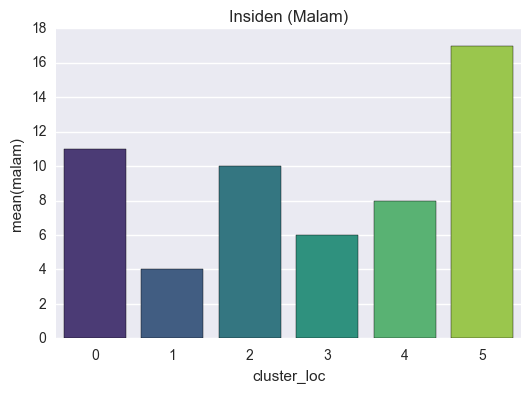

In [305]:
plt.title("Insiden (Malam)")
sns.barplot(data=data_list_cluster_based_time_incident, x='cluster_loc', y='malam', palette="viridis")

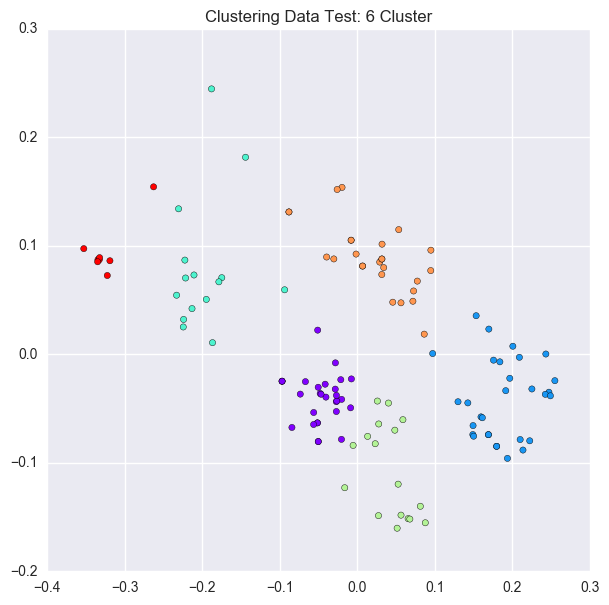

In [312]:
# CLUSTER DATA TEST

data_test_locat = test_data2.copy()
data_test_locat.reset_index().drop('index', axis=1, inplace=True)


# inisiasi value untuk clustering berdasarkan latitude dan longitude
x_mean_test = data_test_locat['lng'].mean()
y_mean_test = data_test_locat['lat'].mean()

data_test_locat['x_axis'] = data_test_locat['lng'].map(lambda v:v-x_mean_test)
data_test_locat['y_axis'] = data_test_locat['lat'].map(lambda v:v-y_mean_test)


X_test = data_test_locat[['x_axis','y_axis']].reset_index().drop('index',axis=1)


# (CLUSTER) try with default n cluster=10
# case: get cluster based from latitude and longitude coordinate place
cluster_kmeans = KMeans(n_clusters=6)


# show properties from kmeans clustering
cluster_kmeans.fit(X_test)


fig = plt.figure(figsize=(7,7))
plt.scatter(X_test['x_axis'], X_test['y_axis'], c=cluster_kmeans.labels_, cmap='rainbow')
plt.title("Clustering Data Test: 6 Cluster")

In [319]:
data_tmp_test_locat = data_test_locat.copy()

In [322]:
data_tmp_test_locat.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date,tmp_class_time_incident,flag_class_time_incident,x_axis,y_axis
723,40.272735,-75.257924,BETHLEHEM PIKE & LENHART RD; HATFIELD TOWNSHIP...,18915.0,Fire: FIRE ALARM,2015-12-12 16:20:21,HATFIELD TOWNSHIP,BETHLEHEM PIKE & LENHART RD,Fire,FIRE ALARM,16,Sabtu,12,2015,2015-12-12,siang,1,0.053572,0.114882
259,40.122891,-75.064149,HUNTINGDON PIKE & WYNKOOP AVE; LOWER MORELAND...,19006.0,EMS: RESPIRATORY EMERGENCY,2015-12-11 12:54:38,LOWER MORELAND,HUNTINGDON PIKE & WYNKOOP AVE,EMS,RESPIRATORY EMERGENCY,12,Jumat,12,2015,2015-12-11,pagi,0,0.247346,-0.034962


In [325]:
data_test_cluster = pd.concat([data_tmp_test_locat.reset_index().drop('index', axis=1), pd.DataFrame(cluster_kmeans.labels_, columns=['cluster_loc'])], axis=1)

data_test_cluster.drop(['desc'], axis=1, inplace=True)

In [326]:
data_test_cluster.head()

,lat,lng,zip,title,timeStamp,twp,addr,major_incident,sub_incident,hour,dayOfWeek,month,year,date,tmp_class_time_incident,flag_class_time_incident,x_axis,y_axis,cluster_loc
0,40.272735,-75.257924,18915.0,Fire: FIRE ALARM,2015-12-12 16:20:21,HATFIELD TOWNSHIP,BETHLEHEM PIKE & LENHART RD,Fire,FIRE ALARM,16,Sabtu,12,2015,2015-12-12,siang,1,0.053572,0.114882,4
1,40.122891,-75.064149,19006.0,EMS: RESPIRATORY EMERGENCY,2015-12-11 12:54:38,LOWER MORELAND,HUNTINGDON PIKE & WYNKOOP AVE,EMS,RESPIRATORY EMERGENCY,12,Jumat,12,2015,2015-12-11,pagi,0,0.247346,-0.034962,1
2,40.097591,-75.252537,19444.0,EMS: ABDOMINAL PAINS,2015-12-10 23:32:46,WHITEMARSH,BARBERRY DR & PHEASANT LN,EMS,ABDOMINAL PAINS,23,Kamis,12,2015,2015-12-10,sore,2,0.058958,-0.060263,3
3,40.034867,-75.327606,19010.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 20:49:08,LOWER MERION,MONTGOMERY AVE & THORNBROOK AVE,EMS,RESPIRATORY EMERGENCY,20,Kamis,12,2015,2015-12-10,sore,2,-0.016111,-0.122987,3
4,40.311629,-75.331096,18964.0,EMS: DIZZINESS,2015-12-11 12:57:49,FRANCONIA,SUMMIT ST & COLONIAL AVE,EMS,DIZZINESS,12,Jumat,12,2015,2015-12-11,pagi,0,-0.019601,0.153776,4


In [327]:
# show most incident time in cluster zone
pi = pd.DataFrame(data_test_cluster['cluster_loc'].value_counts().head(10))
pi.reset_index(inplace=True)
pi.columns = ['cluster_loc', 'jumlah_call']
pi

# po.sort(['cluster_loc', 'jumlah_call'], ascending=[1,0])

,cluster_loc,jumlah_call
0,1,30
1,0,29
2,4,26
3,3,17
4,2,15
5,5,8


In [328]:
# show total incident in cluster zone based on latitude and longitude

counter_0_0 = counter_0_1 = counter_0_2 = counter_0_3 = 0
counter_1_0 = counter_1_1 = counter_1_2 = counter_1_3 = 0
counter_2_0 = counter_2_1 = counter_2_2 = counter_2_3 = 0
counter_3_0 = counter_3_1 = counter_3_2 = counter_3_3 = 0
counter_4_0 = counter_4_1 = counter_4_2 = counter_4_3 = 0
counter_5_0 = counter_5_1 = counter_5_2 = counter_5_3 = 0

jon=0
satu = dua = tiga = empat = lima = nol = 0

for i in data_test_cluster['cluster_loc']:
#     print i    
    if data_test_cluster['cluster_loc'][jon]==0:
        if data_test_cluster['flag_class_time_incident'][jon]==0:
            counter_0_0+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==1:
            counter_0_1+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==2:
            counter_0_2+=1
        else:
            counter_0_3+=1
            
        nol+=1
        
    elif data_test_cluster['cluster_loc'][jon]==1:
#         print "nilai 1"
        if data_test_cluster['flag_class_time_incident'][jon]==0:
            counter_1_0+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==1:
            counter_1_1+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==2:
            counter_1_2+=1
        else:
            counter_1_3+=1

        satu+=1
        
    elif data_test_cluster['cluster_loc'][jon]==2:
#         print "nilai 2"
        if data_test_cluster['flag_class_time_incident'][jon]==0:
            counter_2_0+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==1:
            counter_2_1+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==2:
            counter_2_2+=1
        else:
            counter_2_3+=1

        dua+=1
        
    elif data_test_cluster['cluster_loc'][jon]==3:
#         print "nilai 3"
        if data_test_cluster['flag_class_time_incident'][jon]==0:
            counter_3_0+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==1:
            counter_3_1+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==2:
            counter_3_2+=1
        else:
            counter_3_3+=1
            
        tiga+=1
        
    elif data_test_cluster['cluster_loc'][jon]==4:
#         print "nilai 4"
        if data_test_cluster['flag_class_time_incident'][jon]==0:
            counter_4_0+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==1:
            counter_4_1+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==2:
            counter_4_2+=1
        else:
            counter_4_3+=1
            
        empat+=1
    else:
#         print "nilai 5"
        if data_test_cluster['flag_class_time_incident'][jon]==0:
            counter_5_0+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==1:
            counter_5_1+=1
        elif data_test_cluster['flag_class_time_incident'][jon]==2:
            counter_5_2+=1
        else:
            counter_5_3+=1
            
        lima+=1
        
    jon+=1

In [329]:
print "======== Cluster 0 ========"
print "Jumlah insiden di pagi hari pada cluster 0:", counter_0_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 0:", counter_0_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 0:", counter_0_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 0:", counter_0_3, "kasus"

print "\n======== Cluster 1 ========"
print "Jumlah insiden di pagi hari pada cluster 1:", counter_1_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 1:", counter_1_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 1:", counter_1_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 1:", counter_1_3, "kasus"

print "\n======== Cluster 2 ========"
print "Jumlah insiden di pagi hari pada cluster 2:", counter_2_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 2:", counter_2_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 2:", counter_2_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 2:", counter_2_3, "kasus"

print "\n======== Cluster 3 ========"
print "Jumlah insiden di pagi hari pada cluster 3:", counter_3_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 3:", counter_3_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 3:", counter_3_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 3:", counter_3_3, "kasus"

print "\n======== Cluster 4 ========"
print "Jumlah insiden di pagi hari pada cluster 4:", counter_4_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 4:", counter_4_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 4:", counter_4_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 4:", counter_4_3, "kasus"

print "\n======== Cluster 5 ========"
print "Jumlah insiden di pagi hari pada cluster 5:", counter_5_0, "kasus"
print "Jumlah insiden di siang hari pada cluster 5:", counter_5_1, "kasus"
print "Jumlah insiden di sore hari pada cluster 5:", counter_5_2, "kasus"
print "Jumlah insiden di malam hari pada cluster 5:", counter_5_3, "kasus"

======== Cluster 0 ========
Jumlah insiden di pagi hari pada cluster 0: 10 kasus
Jumlah insiden di siang hari pada cluster 0: 14 kasus
Jumlah insiden di sore hari pada cluster 0: 3 kasus
Jumlah insiden di malam hari pada cluster 0: 2 kasus

======== Cluster 1 ========
Jumlah insiden di pagi hari pada cluster 1: 8 kasus
Jumlah insiden di siang hari pada cluster 1: 17 kasus
Jumlah insiden di sore hari pada cluster 1: 2 kasus
Jumlah insiden di malam hari pada cluster 1: 3 kasus

======== Cluster 2 ========
Jumlah insiden di pagi hari pada cluster 2: 6 kasus
Jumlah insiden di siang hari pada cluster 2: 7 kasus
Jumlah insiden di sore hari pada cluster 2: 0 kasus
Jumlah insiden di malam hari pada cluster 2: 2 kasus

======== Cluster 3 ========
Jumlah insiden di pagi hari pada cluster 3: 2 kasus
Jumlah insiden di siang hari pada cluster 3: 8 kasus
Jumlah insiden di sore hari pada cluster 3: 5 kasus
Jumlah insiden di malam hari pada cluster 3: 2 kasus

======== Cluster 4 ========
Jumlah inside

In [330]:
cluster_loc_array = [0, 1, 2, 3, 4, 5]
pagi_array = [counter_0_0, counter_1_0, counter_2_0, counter_3_0, counter_4_0, counter_5_0]
siang_array = [counter_0_1, counter_1_1, counter_2_1, counter_3_1, counter_4_1, counter_5_1]
sore_array = [counter_0_2, counter_1_2, counter_2_2, counter_3_2, counter_4_2, counter_5_2]
malam_array = [counter_0_3, counter_1_3, counter_2_3, counter_3_3, counter_4_3, counter_5_3]

data_list_cluster_based_time_incident_test = pd.DataFrame({'cluster_loc': cluster_loc_array, 'pagi': pagi_array, 'siang': siang_array, 'sore': sore_array, 'malam': malam_array})

In [332]:
data_list_cluster_based_time_incident_test

,cluster_loc,malam,pagi,siang,sore
0,0,2,10,14,3
1,1,3,8,17,2
2,2,2,6,7,0
3,3,2,2,8,5
4,4,2,10,9,5
5,5,0,1,4,3


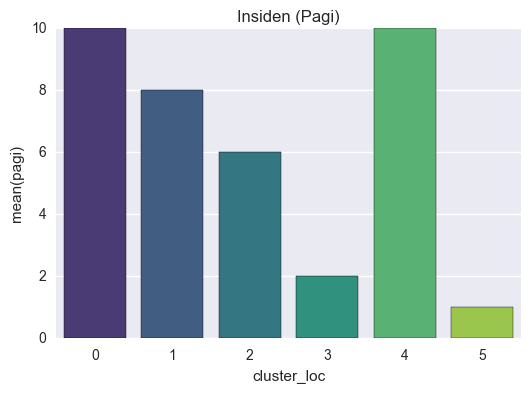

In [333]:
plt.title("Insiden (Pagi)")
# sns.lmplot('malam', 'cluster_loc', data=data_list_cluster_based_time_incident, fit_reg=False)

# fig1 = plt.figure(figsize=(3,3))
sns.barplot(data=data_list_cluster_based_time_incident_test, x='cluster_loc', y='pagi', palette="viridis")
# fig1.tight_layout()

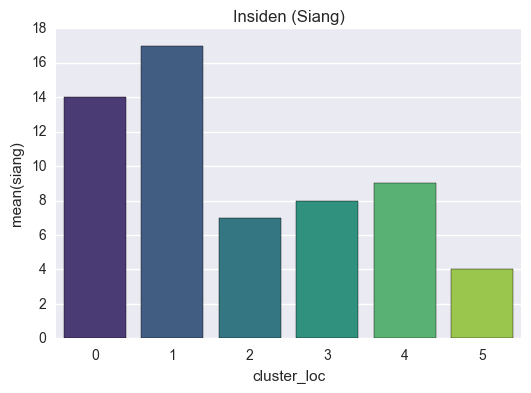

In [335]:
plt.title("Insiden (Siang)")
# sns.lmplot('malam', 'cluster_loc', data=data_list_cluster_based_time_incident, fit_reg=False)

# fig1 = plt.figure(figsize=(3,3))
sns.barplot(data=data_list_cluster_based_time_incident_test, x='cluster_loc', y='siang', palette="viridis")
# fig1.tight_layout()

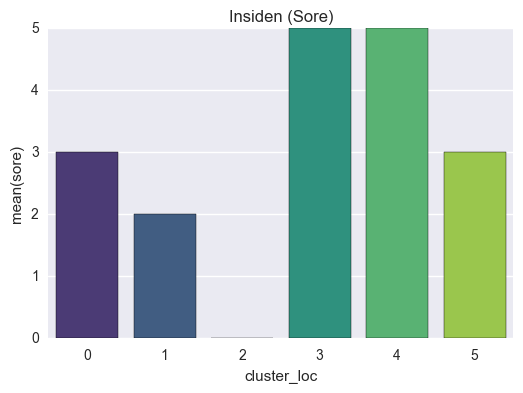

In [336]:
plt.title("Insiden (Sore)")
# sns.lmplot('malam', 'cluster_loc', data=data_list_cluster_based_time_incident, fit_reg=False)

# fig1 = plt.figure(figsize=(3,3))
sns.barplot(data=data_list_cluster_based_time_incident_test, x='cluster_loc', y='sore', palette="viridis")
# fig1.tight_layout()

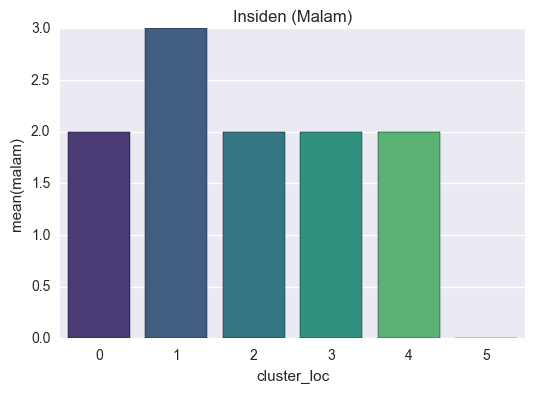

In [337]:
plt.title("Insiden (Malam)")
# sns.lmplot('malam', 'cluster_loc', data=data_list_cluster_based_time_incident, fit_reg=False)

# fig1 = plt.figure(figsize=(3,3))
sns.barplot(data=data_list_cluster_based_time_incident_test, x='cluster_loc', y='malam', palette="viridis")
# fig1.tight_layout()

In [338]:
#============================================

In [339]:
# count error value with linear regression

# Train the model
XX = data_train_locat[['x_axis']]
y = data_train_locat.y_axis
lr = LinearRegression()
lr.fit(XX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [340]:
# Predict on the test data
X_test = data_test_locat[['x_axis']]
y_test = data_test_locat.y_axis
y_pred = lr.predict(X_test)

In [341]:
# Compute the root-mean-square
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print "Error value:", rms

Error value: 0.0720441820755


In [342]:
#============================================

# Finish